# Source Valid Data

In [1]:
import pandas as pd
import numpy as np
import math
from statistics import mean 


In [26]:
df = pd.read_csv('../../../datasets/dr-nubel/strain_stress/AGR-201.csv')
# df = pd.read_csv('../../../datasets/dr-nubel/strain_stress/AGR-180.csv')
df.head(2)

,strain,stress
0,-0.0135,0.630
1,0.0272,2.311


To calculate the shear strength of the shale samples using the data you have, you can follow these steps:

-    1- Compute the mean and standard deviation of the triaxial test data for each of the 15 shale samples.
-    2- Compute the confining pressure for each sample by averaging the values of the three confining pressures used in the triaxial test.
-    3- Calculate the deviatoric stress (σ1 - σ3) for each sample, where σ1 is the maximum stress applied during the triaxial test and σ3 is the confining pressure.
-    4- Calculate the mean stress (σ1 + 2σ3)/3 for each sample.
-    5- Calculate the angle of internal friction (φ) using the formula:

***tan(φ) = (σ1 - σ3)/(2P)***
<p style="color:red">tan(φ) = (σ1 - σ3)/(2P)</p>
where P is the mean stress.
Calculate the cohesion (c) using the formula:

***c = (τ1 + τ2 + τ3)/3 - σn tan(φ)***
<p style="color:red">c = (τ1 + τ2 + τ3)/3 - σn tan(φ)</p>

where τ1, τ2, and τ3 are the shear stresses at failure for the three stress paths tested in the triaxial test, and σn is the normal stress.
Calculate the shear strength (τ) using the formula:

***τ = c + σn tan(φ)***
<p style="color:red">τ = c + σn tan(φ)</p>

where σn is the mean stress.
By following these steps, you can calculate the shear strength of the shale samples from the triaxial test data. Once you have the shear strength values, you can use them as the target variable for training an artificial neural network to predict the shear strength of other shale samples based on their triaxial and cone penetration test data.

### Manual Calculations

#### angle - tan(φ) = (σ1 - σ3)/(2P)
- σ1 = 368.506
- σ3 = 200
- P = mean stress

In [27]:
q1 = df.stress.max()
q3 = 200
p = df.stress.mean()

q1,q3,p

(368.506, 200, 217.51302197802195)

In [28]:
tan_tita = (q1 - q3)/(2*p)
tan_tita # slope

0.3873469240315787

In [29]:
# tita = 1/math.tan(tan_tita)
tita = np.degrees(tan_tita)
tita

22.193343954383984

In [30]:
# tan_tita = np.radians(tita)
# tan_tita

In [31]:
# normal ang
qm = (q1 + q3)/2
tm = (q1 - q3)/2

print(qm,tm)

q = qm - (tm * math.sin(tita))
print(q)

284.253 84.25299999999999
301.17272690207574


In [32]:
# effective stress
eq = q - q3
eq

101.17272690207574

In [9]:
q-qq

NameError: name 'qq' is not defined

Effective stress = normal stress - pore water pressure  (σ = σ1 - σ3)

#### Intercept - c = (τ1 + τ2 + τ3)/3 - σn tan(φ)
- τ1 = 368.506
- τ2 = 721.295
- τ3 = 705.545

In [33]:
max_stress = max(df.stress) # find the maximum stress value
print(df[df.stress == max_stress].index[0])
t2 = df[df.stress == max_stress].index[0]
# max_strain = df[df.stress == max_stress].values[0][0]
max_stress1 = df.stress[t2-2] # find the corresponding strain value
max_stress2 = df.stress[t2-1]
max_stress3 = df.stress[t2]
max_stress1,max_stress2,max_stress3

181


(368.089, 368.297, 368.506)

In [34]:
c = (max_stress1+max_stress3+max_stress3)/3 - (q*tan_tita)
print(c)

s,c1=np.polyfit(df.strain,df.stress,1)
print(c1)

251.70867063227828
101.301060890398


In [35]:
slope = np.diff(df.stress) / np.diff(df.strain)
slope
peak_index = np.argmax(slope)
print(peak_index)
# Calculate cohesion
cohesion = (slope[peak_index-1] + slope[peak_index+1]) / 2

print("Cohesion:", cohesion)

22
Cohesion: 127.4448529411768


#### Tau - τ = c + σn tan(φ)

In [36]:
# t = c + (eq*tan_tita)
# t = c1 + (eq*tan_tita)
t = cohesion + (eq*tan_tita)

t

166.6337975025828

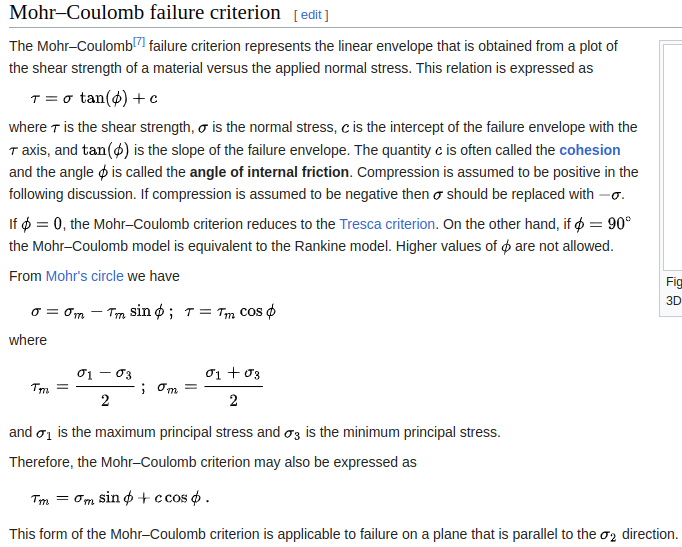

### Automatic

#### Angle

In [42]:
slope, intercept = np.polyfit(df.strain,df.stress,1)
slope, intercept

(17.755623567162417, 101.301060890398)

In [62]:
tita2 = np.degrees(slope)
tita2

1017.322293021426

In [47]:
# tita2 = 1/math.tan(slope)
# tita2

-0.5166313254478248

In [65]:
# tita2a = np.radians(slope)
tita2a = np.rad2deg(slope)
tita2a

1017.322293021426

#### Average slope and Angle

In [29]:
df2 = df[df.stress <= 364.724].iloc[-12:-1]
df2 = df
# df2

In [31]:
l = []
for i in range(1,len(df2)):
    # print(i)
    l.append(np.arctan2(df2.iloc[-i][1] - df2.iloc[-(i+1)][1], df2.iloc[-i][0] - df2.iloc[-(i+1)][0]))
    # print(np.arctan2(df2.iloc[-i][1] - df2.iloc[-(i+1)][1], df2.iloc[-i][0] - df2.iloc[-(i+1)][0]))

print('average slope:',mean(l))
av_sl = mean(l)
ang = np.degrees(av_sl)
print('Angle:',ang)


average slope: 1.4046113405281402
Angle: 80.47830166847531


#### Normal stress
q = qm - tm sin(φ)

qm = (q1 + q3)/2

tm = (q1 - q3)/2

In [59]:
qm = (q1 + q3)/2
tm = (q1 - q3)/2

qm,tm

(284.253, 84.25299999999999)

In [69]:
q = qm - (tm * math.sin(tita2))
q

328.558344130285

#### Tau - τ = c + σn tan(φ)

In [70]:
# t
# t = c + Qtan0
t2 = intercept + (q * slope)
t2

5935.0593391179455